<a href="https://colab.research.google.com/github/yangpimpollo/temp2/blob/main/ExpoRegre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cargar Datos**

In [ ]:
data1 <- read.csv("data2.csv", sep = ";")
head(data1)

,costs,revenue
,<dbl>,<dbl>
1,108.05,900
2,123.98,918
3,154.07,1080
4,177.38,1350
5,189.65,1791
6,169.10,1800


In [ ]:
dim(data1)

[1] 50  2

**Paquetes Principales**

In [ ]:
install.packages('lmtest')
library(lmtest)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




**Modelo**

In [ ]:
model <- lm(revenue ~ costs, data = data1)

data1$residuals <- residuals(model)
data1$fitted <- fitted(model)

`geom_smooth()` using formula = 'y ~ x'


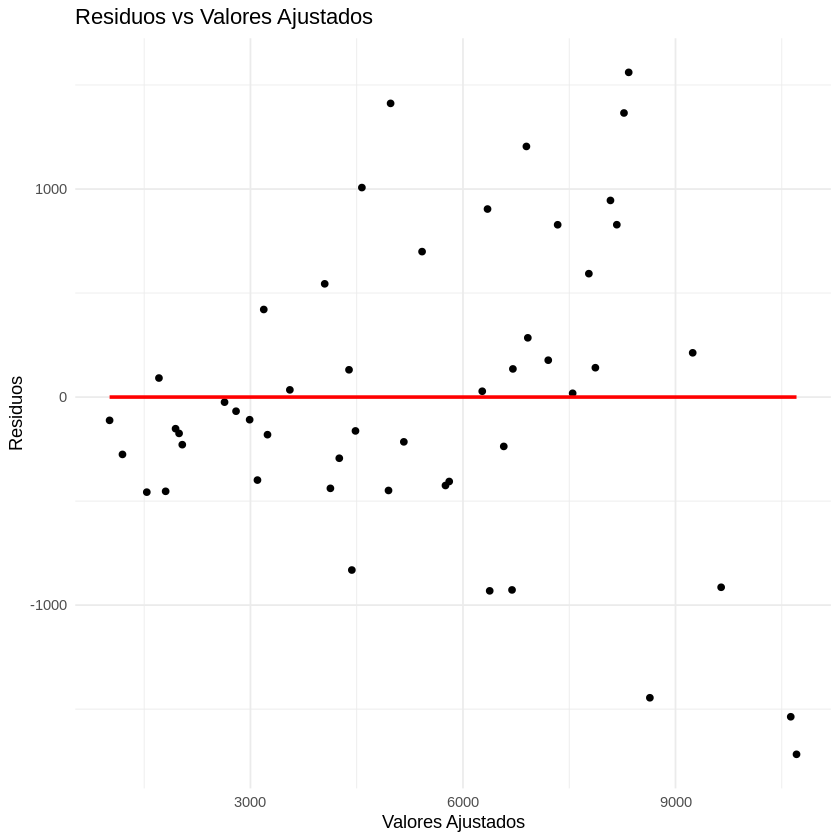

In [ ]:
ggplot(data1, aes(x = fitted, y = residuals)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  labs(title = "Residuos vs Valores Ajustados",
       x = "Valores Ajustados",
       y = "Residuos") +
  theme_minimal()

**Test de Goldfeld y Quandt**

In [ ]:
gqtest(model, order.by = ~ costs, data = data1, fraction = 10)


	Goldfeld-Quandt test

data:  model
GQ = 8.5916, df1 = 18, df2 = 18, p-value = 1.614e-05
alternative hypothesis: variance increases from segment 1 to 2


**Conclusión:**
*para un α = 5% el p-valor es inferior a 0.05 podemos concluir que existe heterocedasticidad*
